Task-3

**IRIS FLOWER CLASSIFICATION**

OVERVIEW :

* Iris Flower Classification is a classic machine learning task used for learning and practicing classification algorithms.

PROBLEM STATEMENT:-

* The Classification of the Iris flower on basis of various algorithms based on various features like sepal length, sepal width, petal length, and petal width

BUSINESS UNDERSTANDING:

* The dataset contains features like sepal length, sepal width, petal length, and petal width for three different species of iris flowers.

BUSINESS OBJECTIVE:

* This project involves data preprocessing, model selection, evaluation. You can use classification algorithms like logistic regression, decision trees, k-nearest neighbors (KNN), or support vector machines (SVM) for this classification task.

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**DATA CLEANING AND HANDLING MISSING VALUES**

In [ ]:
#Lets check for null values in the dataframe
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.drop_duplicates()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.shape

(150, 6)

This seems to be no duplicates in the dataframe.

In [ ]:
#Lets see how the data is distribute over species
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

We can see all the three are equally distributed.

**HANDLING OUTLIERS**

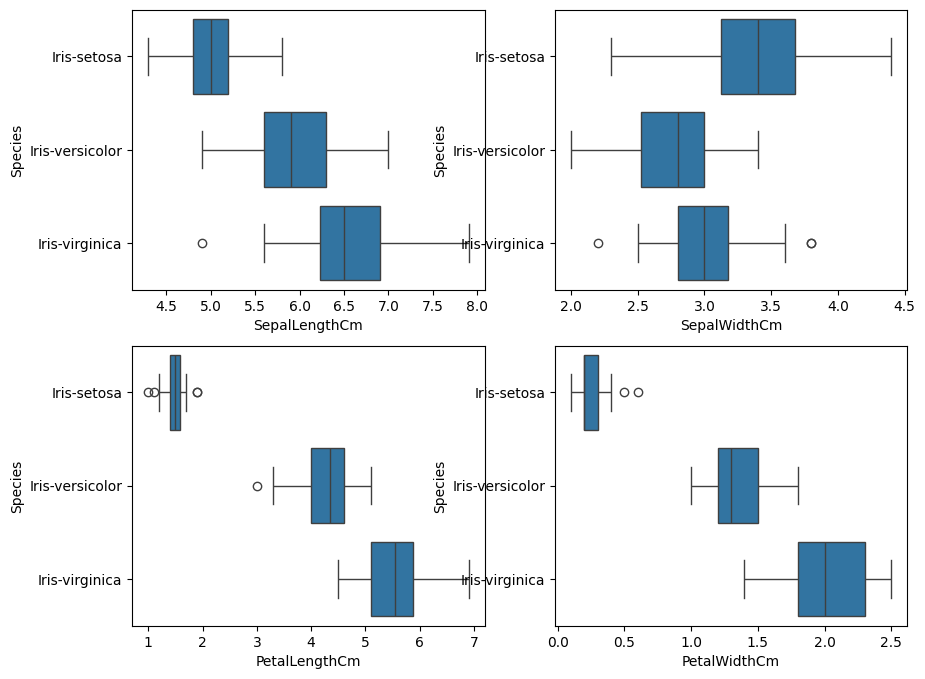

In [ ]:
# Lets create subplots using boxplots to identify outliers
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot individual box plots
sns.boxplot(x='SepalLengthCm', y='Species', data=iris, ax=axs[0, 0])
sns.boxplot(x='SepalWidthCm', y='Species', data=iris, ax=axs[0, 1])
sns.boxplot(x='PetalLengthCm', y='Species', data=iris, ax=axs[1, 0])
sns.boxplot(x='PetalWidthCm', y='Species', data=iris, ax=axs[1, 1])

# Show the plots
plt.show()


We dont see any outliers. But in Iris Setosa there might be few outliers which are negligible.

**DATA VISUALIZATION AND EDA**

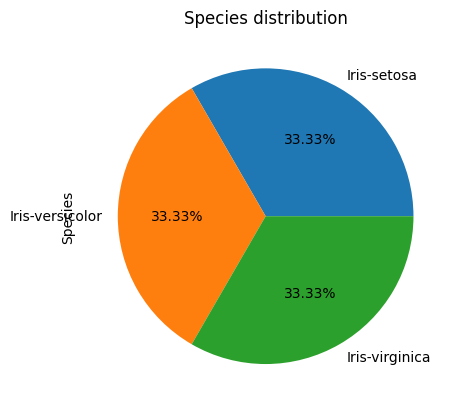

In [ ]:
#Lets create a pie chart to see the data distributio of the target variable 'Species'
iris['Species'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Species distribution')
plt.show()

UNIVARIATE ANALYSIS

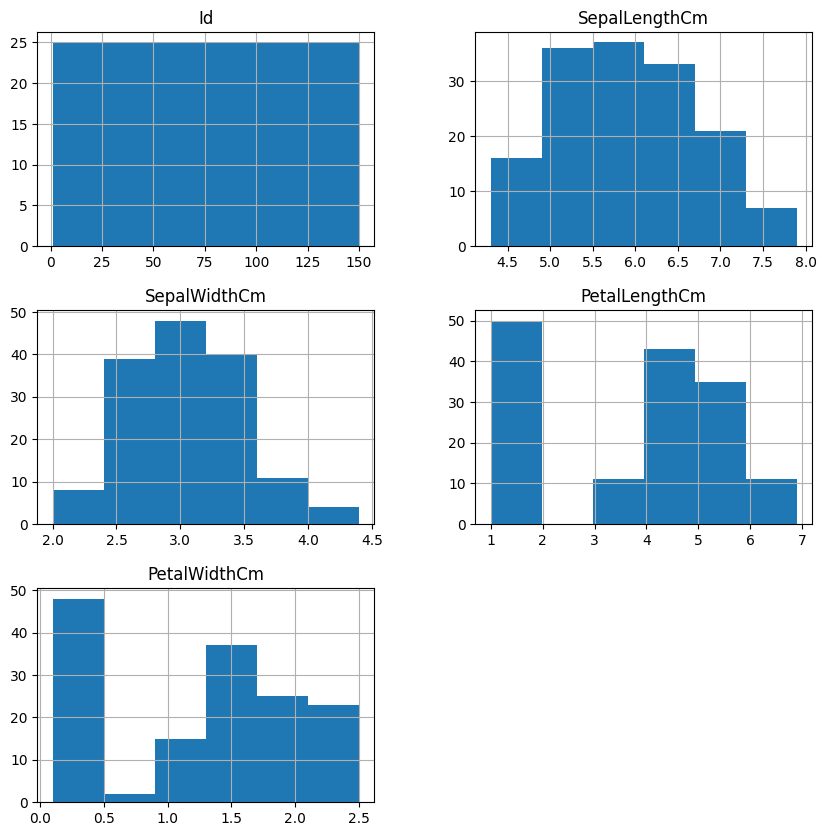

In [ ]:
#We can plot a histogram to see the distribution of the other variables
iris.hist(bins=6, figsize=(10, 10))
plt.show()

OBSERVATIONS:
* The distribution of Sepal Length is high above 35 and is between 5.5 to 6.5.
* The distribution of Sepal width is high upto 60  and is beetween 2.5 to 3.5.
* The distribution of Petal Length is high at 50 and is between 1 and 2.
* The distribution of Petal Width is high around 50 and is between 0.0 to 0.5

BIVARIATE ANALYSIS

Lets compare the sepal length and sepal width:

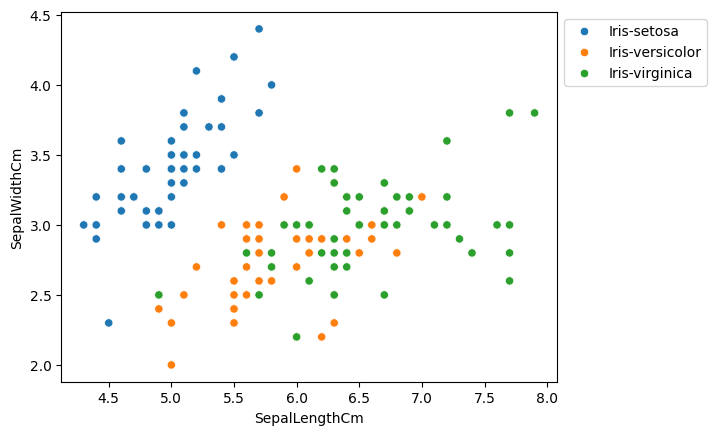

In [ ]:
sns.scatterplot(iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.legend(bbox_to_anchor = (1, 1), loc=2)
plt.show()

OBSERVATIONS:

* Here we can see that the Sepal Length for Iris-sentosa Species is small whereas the Sepal Width is higher.
* The Sepal Length for Iris-versicolor Species is having small length and medium Sepal width.
* The Sepal Length for Iris-Virginica Species is higher length with a smaller Sepal Width.

Lets compare the petal length and width:

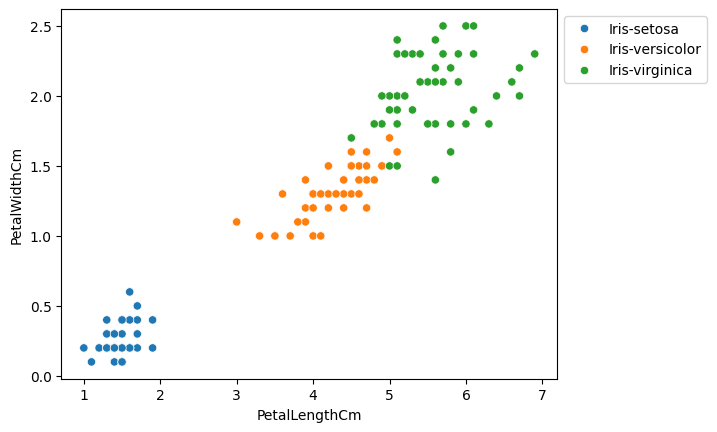

In [ ]:
sns.scatterplot(iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.legend(bbox_to_anchor = (1, 1), loc=0)
plt.show()

OBSERVATIONS:
* Here we can see the petal length and width is small for Iris-sentosa.
* And for the Iris-versicolor the petal length and width are medium.
* For Iris-virginica the petal length and width are high compare to other two variants.

**MULTIVARIATE ANALYSIS**

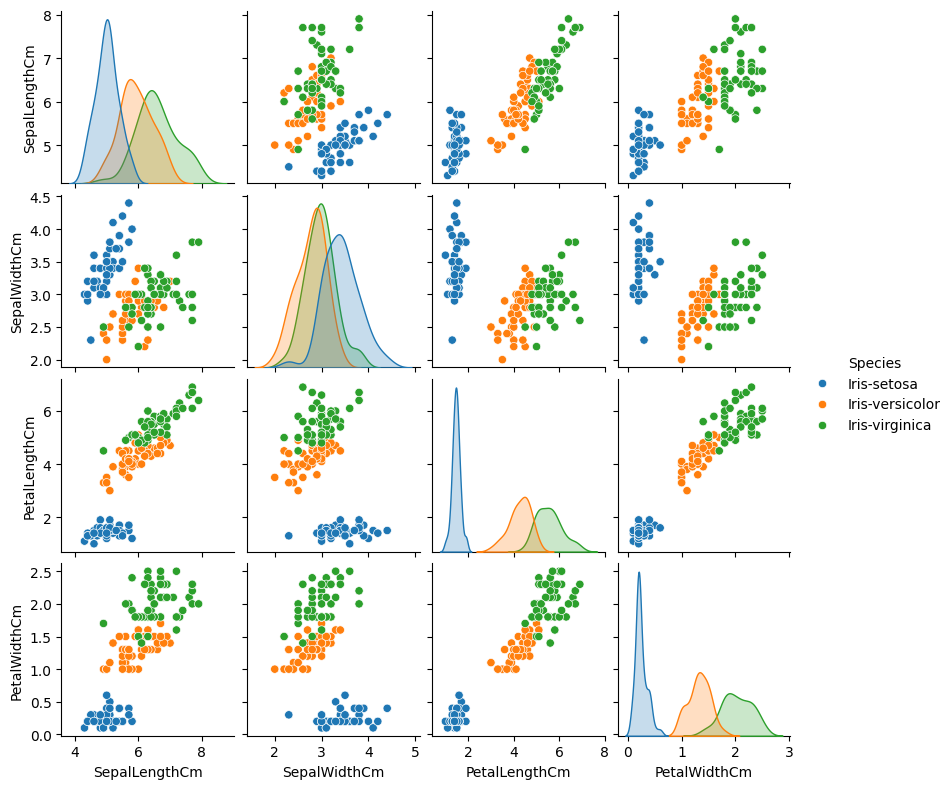

In [ ]:

#Lets use pair plots for this

iris.drop(['Id'], axis=1, inplace=True)
sns.pairplot(data = iris, hue="Species", height=2)
plt.show()

OBSERVATIONS:

* The Plots show that the Iris-sentosa has smaller petal width and petal length with large sepal width and small sepal length.
* The plot shows that Iris-versicolor has medium petal width and petal length with small sepal width and medium sepal length.
* The plot shows that Iris-verginica has higher petal length and higher petal width with higher sepal length and small sepal width.

In [ ]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


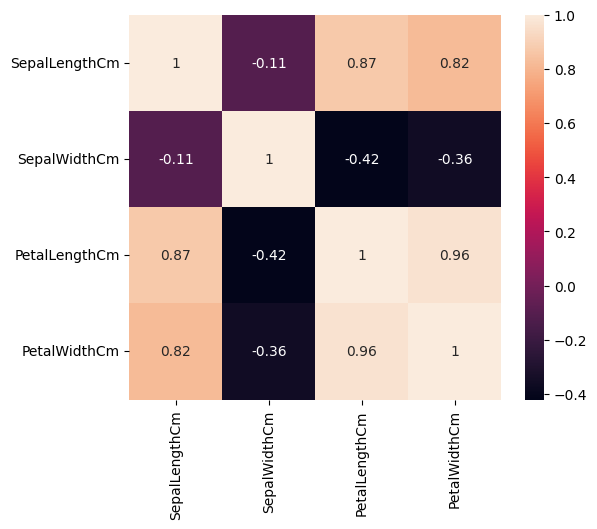

In [ ]:
#Lets plot a heatmap
corrmat = iris.corr()
fig = plt.figure(figsize=(6,5))
sns.heatmap(corrmat, annot = True)
plt.show()

OBSERVATIONS:
* We can see good correlation between petal length and petal width (0.96).
* And also there is good correlation between sepal width and petal length (0.87).
* Sepal length and petal width are correlated with good value (0.82).

**Classification of the dataset using different algorithms**


In [ ]:
# By using the Features of columns

X = iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

In [ ]:
# By using target column Species as y

y = iris[['Species']].values

In [ ]:
# Lets create train and test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
log_acc = round(logreg.score(X_train, y_train) * 100, 2)
log_acc

95.0

**Decision Tree classifier**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_acc = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_acc

100.0

**K Nearest Neighbours**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_acc = round(knn.score(X_train, y_train) * 100, 2)
knn_acc

96.0

**Suppor vector machine**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
svc_acc = round(svc.score(X_train, y_train) * 100, 2)
svc_acc

95.0

In [ ]:
#Lets interpret the accuracies of these different models:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Decision Tree'],
    'Score': [svc_acc,knn_acc,log_acc,decision_tree_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,100.0
1,KNN,96.0
0,Support Vector Machines,95.0
2,Logistic Regression,95.0


**CONCLUSION:**
 * The distribution of Sepal Length is high above 35 and is between 5.5 to 6.5.
* The distribution of Sepal width is high upto 60 and is beetween 2.5 to 3.5.
* The distribution of Petal Length is high at 50 and is between 1 and 2.
* The distribution of Petal Width is high around 50 and is between 0.0 to 0.5
* Here we can see that the Sepal Length for Iris-sentosa Species is small whereas the Sepal Width is higher.
* The Sepal Length for Iris-versicolor Species is having small length and medium Sepal width.
* The Sepal Length for Iris-Virginica Species is higher length with a smaller Sepal Width.
* Here we can see the petal length and width is small for Iris-sentosa.
* And for the Iris-versicolor the petal length and width are medium.
* For Iris-virginica the petal length and width are high compare to other two variants.
* We can see good correlation between petal length and petal width (0.96).
* And also there is good correlation between sepal width and petal length (0.87).
* Sepal length and petal width are correlated with good value (0.82).